## Brasil Data Vis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_one = pd.read_excel("./data/brasil.xlsx")
df_one = df_one.dropna(subset=['Confronto_GAC'])

# Convert date to standard format
df_one['yearmo'] = pd.to_datetime(df_one['yearmo'], format='%Ym%m')
df_one.head()

,yearmo,Confronto_GAC,Morte_GAC,feridos_GAC,carcere_privado_GAC,invasão_domicilio_GAC,Operações_policiais,Morte_policial,feridos_polícia,invasão_domicilio,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,den_tiroteio,area1_operacao,area2_operacao,area3_operacao,area4_operacao,area5_operacao,den_operacao
12,2017-01-01,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,3,0,0,0,0,3
13,2017-02-01,8.0,4.0,4.0,0.0,0.0,2.0,2.0,5.0,1.0,...,NaN,NaN,NaN,NaN,0,1,0,1,2,4
14,2017-03-01,5.0,3.0,0.0,0.0,0.0,8.0,7.0,9.0,0.0,...,NaN,NaN,NaN,NaN,9,2,0,0,1,12
15,2017-04-01,5.0,3.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
16,2017-05-01,4.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


<Figure size 2000x1500 with 0 Axes>

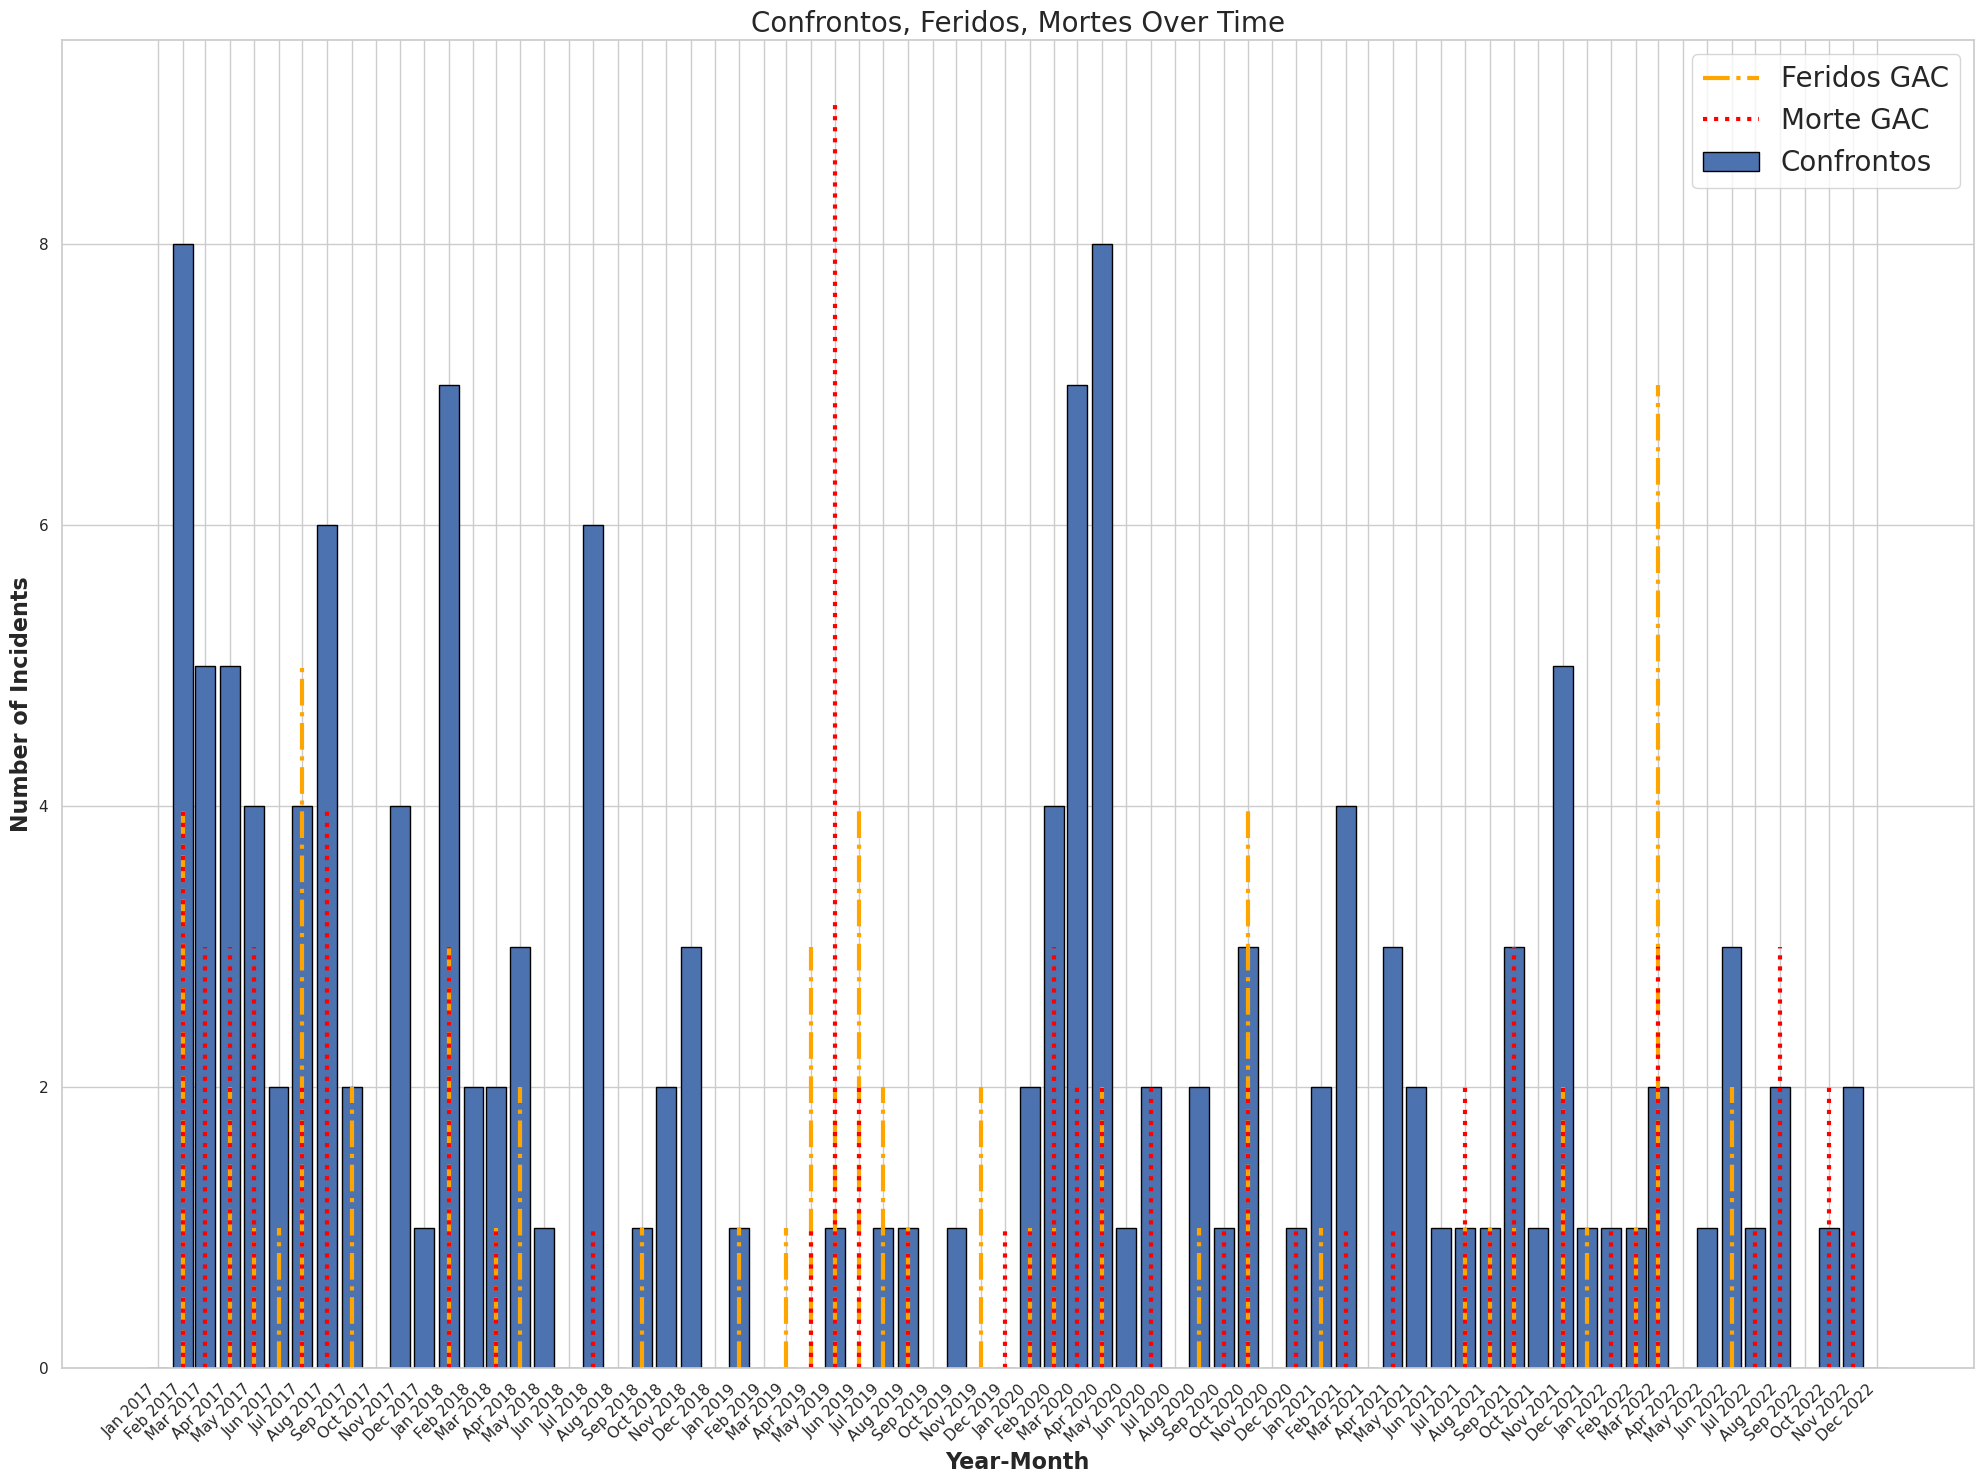

In [22]:
import seaborn as sns
import matplotlib.dates as mdates

width=25

plt.figure(figsize=(20, 15))
plt.rcParams.update({'axes.facecolor': 'white'})

# x = date2num(df_one['yearmo'].to_list())
x = df_one['yearmo']
y = df_one['Confronto_GAC']
z = df_one['feridos_GAC']
k = df_one['Morte_GAC']

sns.set(style="whitegrid")
sns.color_palette()

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x, y, color='b', width=width, edgecolor='black', label='Confrontos', align='center')

for date, value in zip(x, z):
    ax.vlines(x=date, ymin=0, ymax=value, colors='orange', linestyle='-.', linestyles='dotted', label='Feridos GAC' if date == x.iloc[0] else "", linewidth=3)

for date, value in zip(x, k):
    ax.vlines(x=date, ymin=0, ymax=value, colors='red', linestyles='dotted', label='Morte GAC' if date == x.iloc[0] else "", linewidth=3)

# ax.bar(x + pd.DateOffset(days=2), k, color='red', width=width, edgecolor='grey', label='Mortes', align='center')

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xticks(x)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Year-Month', fontweight='bold', fontsize=16)
plt.ylabel('Number of Incidents', fontweight='bold', fontsize=16)
plt.title('Confrontos, Feridos, Mortes Over Time', fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()